In [9]:
# Proyecto 2do BIMESTRE

# Descripción del dataset

## Tema: Conjunto de datos de incendios forestales
Esta es una tarea de regresión difícil, donde el objetivo es predecir el área quemada por incendios forestales, en la región noreste de Portugal, utilizando datos meteorológicos y otros

Source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires



In [204]:
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
import time, random
import base64
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 


from sklearn.metrics import mean_squared_error

In [205]:
data = pd.read_csv('data/forestfires.csv', sep=','); #Lectura del csv

In [206]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [207]:
print(data.keys())

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 48.5+ KB


In [209]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [210]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [211]:
# transformar meses y dias

data['month'] = data['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data['day'] = data['day'].replace({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7})

In [212]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [213]:
data.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

## Analisis de regresion multiple

In [214]:
from sklearn import *

In [215]:
data.shape

(517, 13)

In [216]:
from sklearn.linear_model import LinearRegression

In [217]:
print(data.keys())

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [218]:
x = data[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = data['area']

In [219]:
x

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


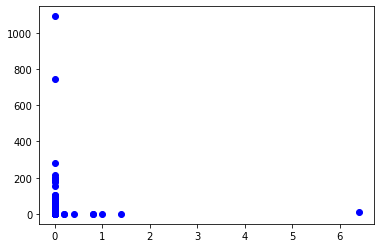

In [220]:

plt.scatter(x['rain'], y, label='data', color='blue')
# plt.plot(data['area'], data['RH'], label='data', color='green')

In [221]:
data_DF = pd.DataFrame(x, )
data_DF = pd.merge(data_DF, pd.DataFrame(y), right_index=True, left_index=True)

In [222]:
data_DF.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
data_DF

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [223]:
corrMatrixM = data_DF.corr()

corrMatrixM.area.sort_values(axis=0, ascending=True)  

RH      -0.075519
rain    -0.007366
ISI      0.008258
wind     0.012317
day      0.023226
FFMC     0.040122
Y        0.044873
DC       0.049383
month    0.056496
X        0.063385
DMC      0.072994
temp     0.097844
area     1.000000
Name: area, dtype: float64

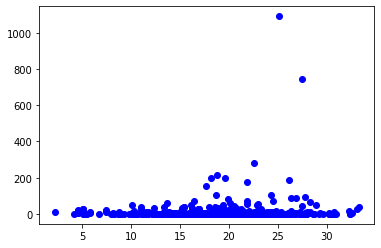

In [182]:
plt.scatter(x['temp'], y, label='data', color='blue')

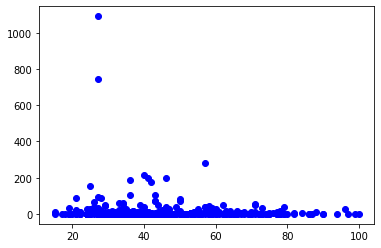

In [183]:
plt.scatter(x['RH'], y, label='data', color='blue')

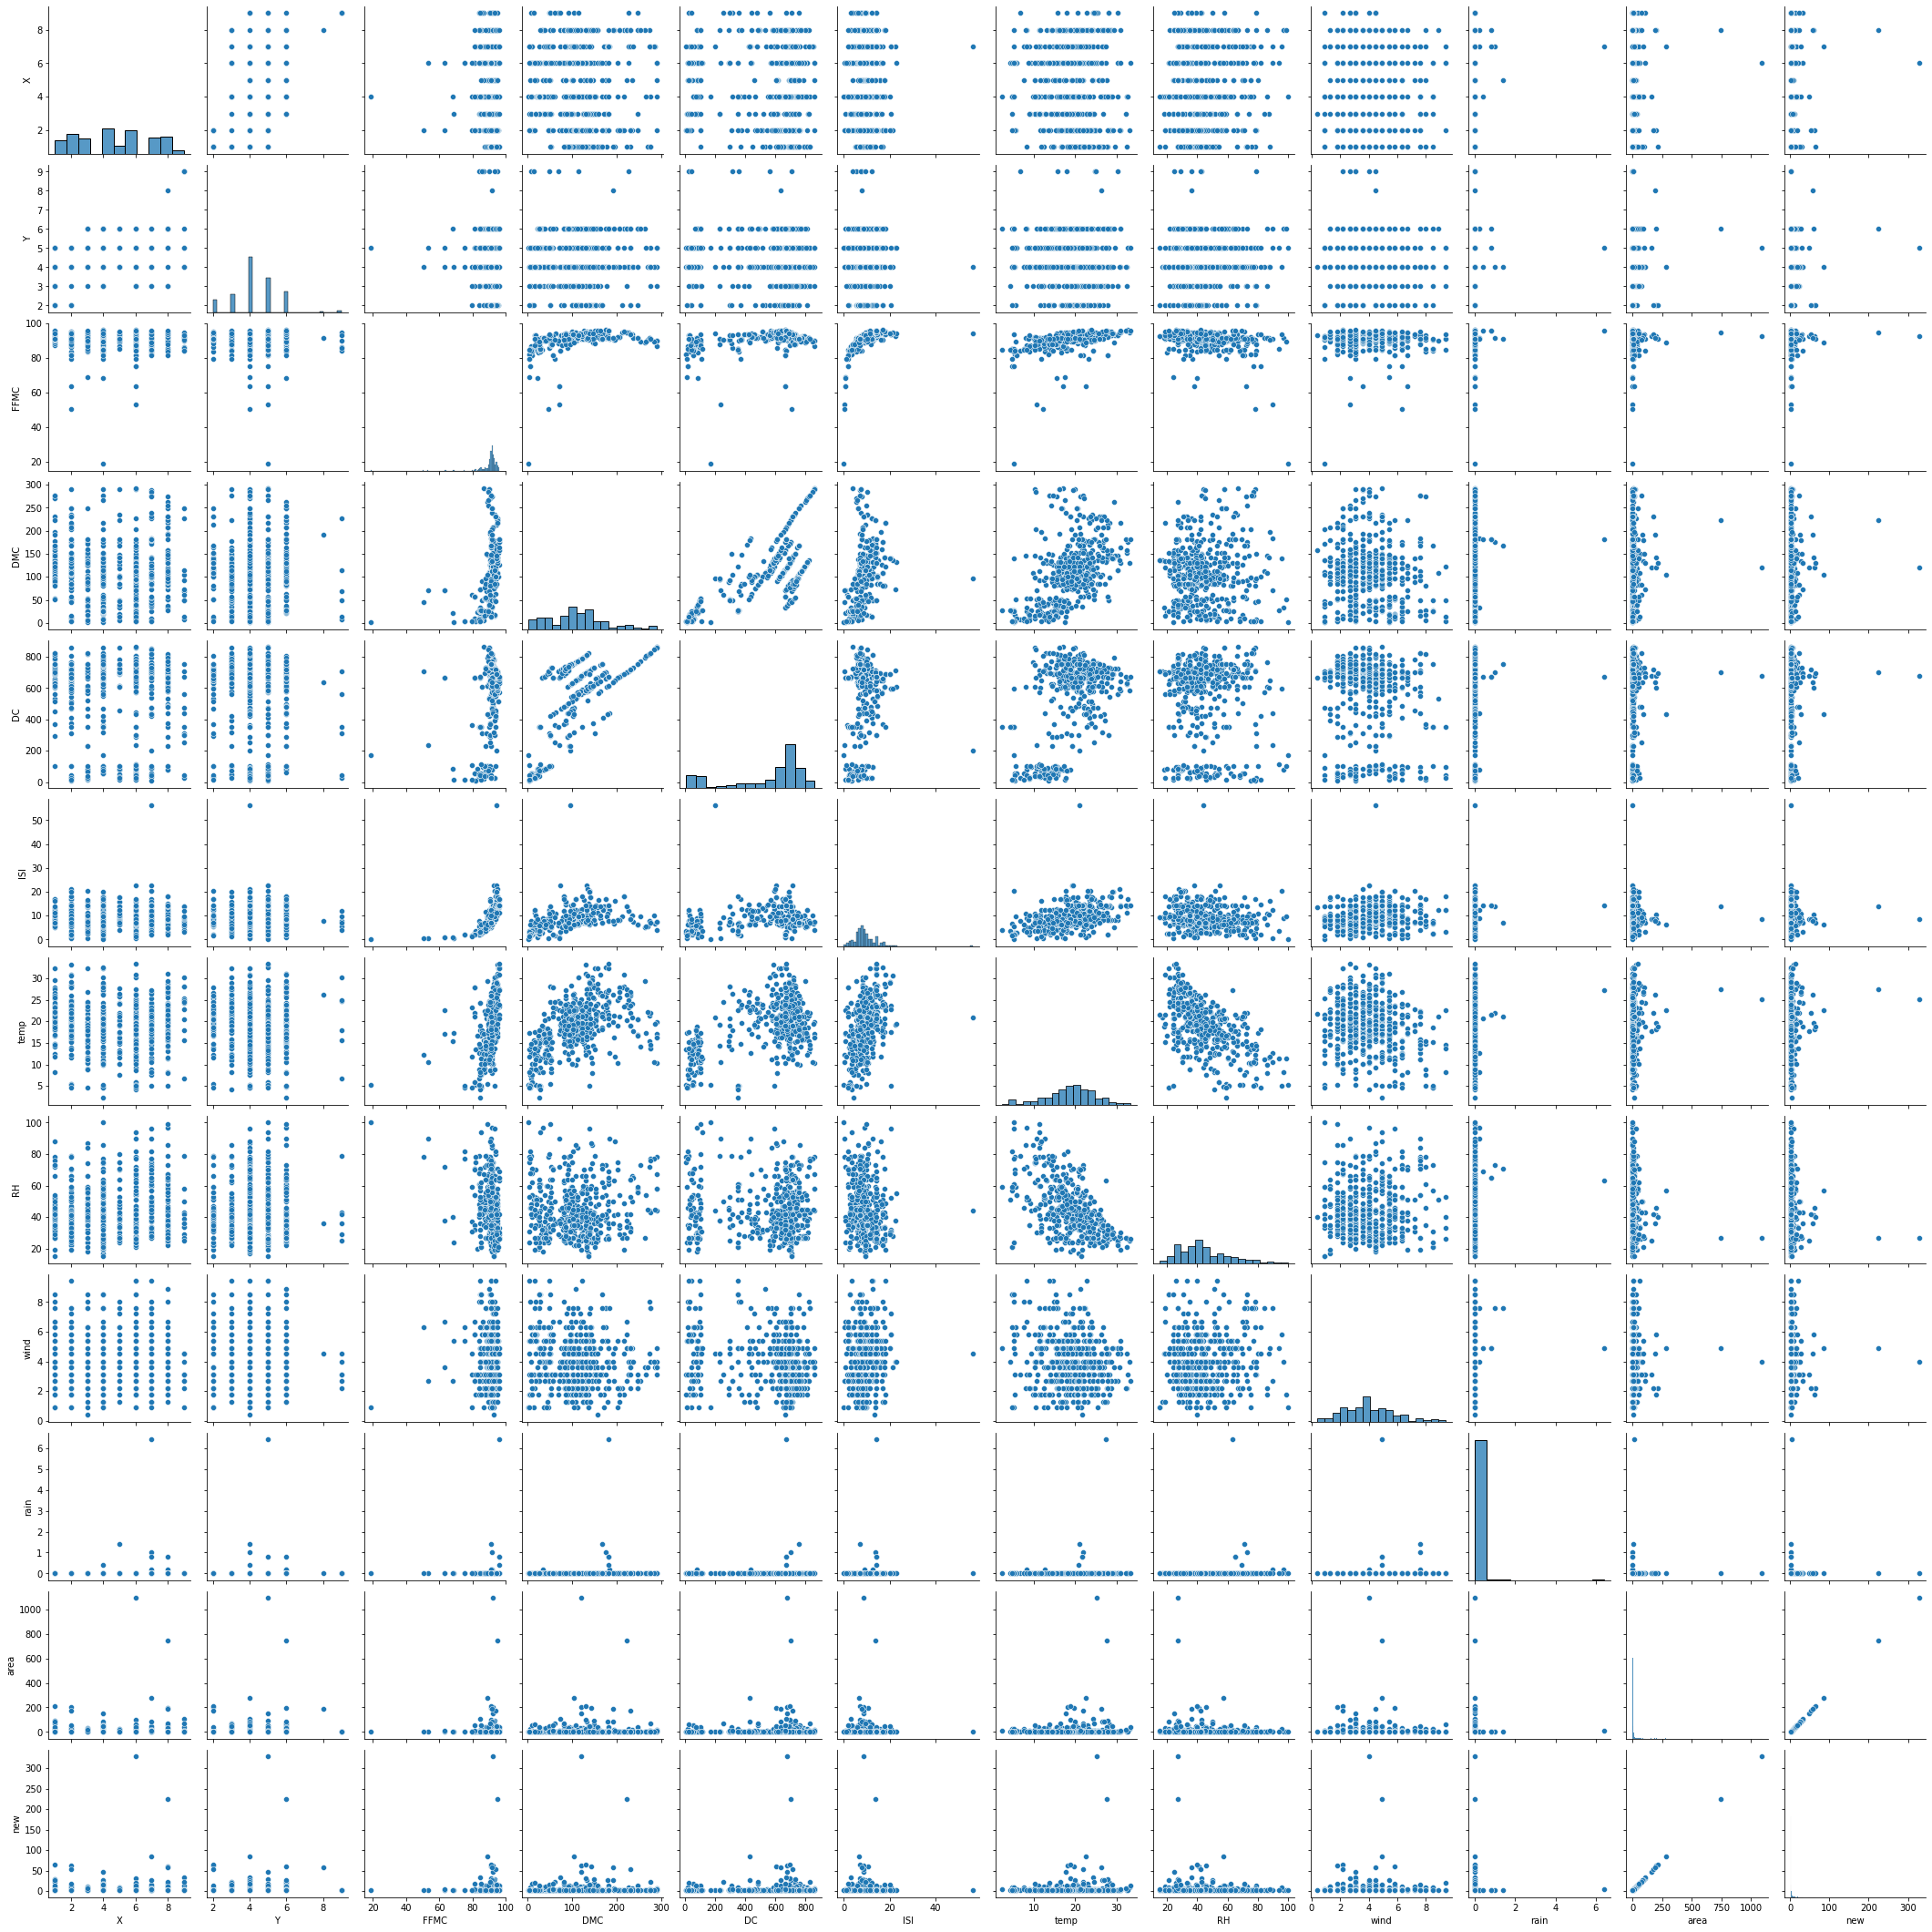

In [111]:
sns.pairplot(data_DF)

In [184]:
from sklearn.model_selection import train_test_split as tts

x_ent, x_test, y_ent, y_test = tts(x, y, train_size=0.8, random_state=42, shuffle=True)
print(x_ent.shape, x_test.shape)

(413, 10) (104, 10)


In [185]:
lm = LinearRegression()
lm.fit(x_test, y_test)

LinearRegression()

In [186]:
print('a = ' + str(lm.intercept_) , 'y  B = ' + str(lm.coef_) )

a = 54.83557146686304 y  B = [ -0.98143196   5.78021978  -0.94207206  -0.11578025   0.02387158
  -1.15409038   2.83684217  -0.55477667   3.02832326 -11.7946981 ]


In [187]:
y_predict = lm.predict(x_test)

print(y_predict)

[-12.1407379   -4.4968389   39.22850105  18.32005979  45.22738116
  24.9553535    6.29611553  67.79666397  49.57719818   6.02210742
  42.34334478  17.84300806  31.42106888  17.5496182   32.02506878
  13.04882987 -20.48655646  35.41671464  29.05487169  37.2273258
  -0.36150879  28.6139162   26.69556436  35.38935226  19.28170269
  41.84678803  39.89354833  31.83398255  18.9993004   14.42528771
  26.64119753  39.02750305  35.74399447  42.6211885   23.73279193
  46.42326881  -7.68735599  34.87187196  15.47055886  31.29783246
  29.82901979  21.97442074 -10.54671639  43.04356367  26.87767466
  19.56904626 -27.67735292  14.3078369   39.5621843   22.58183209
  12.81733765  51.19830013  28.06468014  24.59866392  37.18802148
  29.06868798  16.38716748  17.36475038  15.95016931  11.62852688
  10.00771015  29.62216072  22.35412423  -2.50598367  -3.33857792
  39.65277599  18.76947274  10.80184272  34.86492008   4.2500828
  17.68807015  10.95117766 -40.07979465 -23.75328734  -3.40401363
  -0.8277919

In [189]:
x_test[0:]

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
304,6,5,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0
501,7,5,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8
441,8,6,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0
153,5,4,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0
503,2,4,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0
...,...,...,...,...,...,...,...,...,...,...
167,6,5,96.0,127.1,570.5,16.5,23.4,33,4.5,0.0
275,4,6,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0


In [190]:
lm.score(x_test, y_test )

0.03333236924021654

In [191]:
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 11394.848081186708
Raíz del Error Cuadrático Medio (RMSE) = 106.74665372360255


<AxesSubplot:>

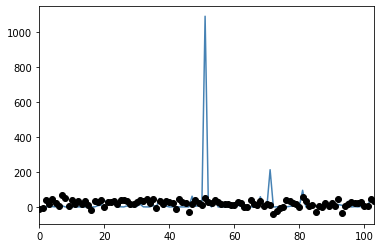

In [192]:
# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#  Calcular the VIF para todo el dataset (si ya se conoce cuál es la variable dependiente, se elimina esa variable)

vifF1 = pd.DataFrame()


vifF1["features"] = data_DF.columns
vifF1["vif_Factor"] = [variance_inflation_factor(data_DF.values, i) for i in range(data_DF.shape[1])]
print(vifF1)

   features  vif_Factor
0         X    7.296916
1         Y   18.605601
2      FFMC   64.088228
3       DMC    8.602038
4        DC   12.519184
5       ISI    6.487388
6      temp   28.465521
7        RH   12.137776
8      wind    6.648394
9      rain    1.040898
10     area    1.063812


In [194]:

#  Calcular the VIF para cada variable independiente:

vifF2 = pd.DataFrame()

x_DF2 = data_DF.drop('FFMC', axis=1)
x_DF2.head()

vifF2["features"] = x_DF2.columns
vifF2["vif_Factor"] = [variance_inflation_factor(x_DF2.values, i) for i in range(x_DF2.shape[1])]
print(vifF2)

KeyError: "['new'] not found in axis"

In [132]:
x_DF2 = x_DF2.drop('FFMC', axis=1)
x_DF2.head()

,X,Y,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [133]:
vifF2 = pd.DataFrame()
vifF2["features"] = x_DF2.columns
vifF2["vif_Factor"] = [variance_inflation_factor(x_DF2.values, i) for i in range(x_DF2.shape[1])]
print(vifF2)

  features  vif_Factor
0        X    7.296908
1        Y   16.611038
2      DMC    8.209439
3       DC   12.208698
4      ISI    6.318780
5     temp   16.385657
6       RH    7.947004
7     wind    5.546161
8     rain    1.020526
9     area    1.063458


In [135]:
x_DF2 = x_DF2.drop('Y', axis=1)
vifF2 = pd.DataFrame()
vifF2["features"] = x_DF2.columns
vifF2["vif_Factor"] = [variance_inflation_factor(x_DF2.values, i) for i in range(x_DF2.shape[1])]
print(vifF2)

  features  vif_Factor
0        X    4.939326
1      DMC    8.209142
2       DC   12.110457
3      ISI    6.301941
4     temp   13.648187
5       RH    6.739630
6     wind    5.434744
7     rain    1.014931
8     area    1.063449


In [136]:
x_DF2 = x_DF2.drop('temp', axis=1)
vifF2 = pd.DataFrame()
vifF2["features"] = x_DF2.columns
vifF2["vif_Factor"] = [variance_inflation_factor(x_DF2.values, i) for i in range(x_DF2.shape[1])]
print(vifF2)

  features  vif_Factor
0        X    4.467267
1      DMC    8.039653
2       DC    9.485056
3      ISI    5.284333
4       RH    6.561978
5     wind    5.219194
6     rain    1.014930
7     area    1.060769


In [137]:
x_DF2 = x_DF2.drop('DC', axis=1)
vifF2 = pd.DataFrame()
vifF2["features"] = x_DF2.columns
vifF2["vif_Factor"] = [variance_inflation_factor(x_DF2.values, i) for i in range(x_DF2.shape[1])]
print(vifF2)

  features  vif_Factor
0        X    4.406613
1      DMC    4.336349
2      ISI    5.092025
3       RH    6.379004
4     wind    5.217583
5     rain    1.011783
6     area    1.060600


In [138]:
x_DF2 = x_DF2.drop('RH', axis=1)
vifF2 = pd.DataFrame()
vifF2["features"] = x_DF2.columns
vifF2["vif_Factor"] = [variance_inflation_factor(x_DF2.values, i) for i in range(x_DF2.shape[1])]
print(vifF2)

  features  vif_Factor
0        X    3.735871
1      DMC    3.802071
2      ISI    5.091964
3     wind    4.264937
4     rain    1.011333
5     area    1.051624


In [139]:
x_DF2 = x_DF2.drop('ISI', axis=1)
vifF2 = pd.DataFrame()
vifF2["features"] = x_DF2.columns
vifF2["vif_Factor"] = [variance_inflation_factor(x_DF2.values, i) for i in range(x_DF2.shape[1])]
print(vifF2)

  features  vif_Factor
0        X    3.572518
1      DMC    2.851164
2     wind    3.615348
3     rain    1.011297
4     area    1.050859


In [140]:
# 80% de las observaciones quedan para el conjunto de entrenamiento y 20% para el conjunto de prueba:

x_new = data_DF.drop(['X', 'DMC', 'wind', 'rain', 'area'], axis=1)

x_ent, x_test, y_ent, y_test = tts(x_new, y, train_size=0.8, random_state=42, shuffle=True)

print(x_ent.shape, x_test.shape)


# Crear una instancia y entrenar el modelo con los conjuntos de datos de entrenamiento:

lmI = LinearRegression()
lmI.fit(x_ent, y_ent)


# Coeficientes de la función de regresión:
print('a = ' + str(lmI.intercept_) , 'y  B = ' + str(lmI.coef_) )

# Utilizar el modelo para generar las predicciones:

y_predict = lmI.predict(x_test)

# Verificar el R^2 (sobre el conjunto de test):

print(40*'*')
print('Coeficiente R^2: ', lmI.score(x_test, y_test)) 
print(40*'*')


# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')

(413, 7) (104, 7)
a = 1.6076029396572267e-13 y  B = [-8.68896132e-16 -1.36002321e-15 -4.16333634e-17 -1.18407075e-15
  5.38604534e-16 -2.95987193e-16  1.00000000e+00]
****************************************
Coeficiente R^2:  1.0
****************************************
Error Cuadrático Medio (MSE) = 7.364732403583629e-28
Raíz del Error Cuadrático Medio (RMSE) = 2.71380404664442e-14


AttributeError: 'list' object has no attribute 'tolist'

In [150]:
# Guardar el modelo de regresión original con las 13 variables independientes:

import joblib

joblib.dump(lm, "model.pkl")

['model.pkl']

In [158]:
# Utilizar el modelo entrenado que hemos guardado

lm = joblib.load("model.pkl")
lm.score(x, y)  # R^2 =

1.0

In [154]:
# Guardar el modelo de regresión original mejorado con las 7 variables independientes:

# variables eliminadas: ['PTRATIO', 'NOX', 'TAX', 'RM', 'AGE', 'B']


joblib.dump(lmI, "model.pkl")  # Guardar de forma persistente

lmI = joblib.load("model.pkl")  # En otro notebook para reusar el modelo guardado

x.feature_names

# variables a conservar: [0, 1, 2, 3, 7, 8, 12]

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [ ]:
x_short = boston.data[:, [0, 1, 2, 3, 7, 8, 12]]  # seleccionar solo los features relevantes

lmI.score(x_short, boston.target)  # R^2 = 0.73

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [57]:
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [58]:
def preprocess_inputs(df, task='regression'):
    df = df.copy()
    
    # Ordinal encode month and day columns
    df = ordinal_encode(
        df,
        column='month',
        ordering=[
            'jan',
            'feb',
            'mar',
            'apr',
            'may',
            'jun',
            'jul',
            'aug',
            'sep',
            'oct',
            'nov',
            'dec'
        ]
    )
    df = ordinal_encode(
        df,
        column='day',
        ordering=[
            'sun',
            'mon',
            'tue',
            'wed',
            'thu',
            'fri',
            'sat'
        ]
    )
    
    # Split df into X and y
    if task == 'regression':
        y = df['area']
    elif task == 'classification':
        y = df['area'].apply(lambda x: 1 if x > 0 else 0)
    
    X = df.drop('area', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale feature data (X)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [59]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='regression')

In [60]:
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.609497,0.549280,0.653317,-0.970161,0.060985,0.279029,0.572473,-0.406018,0.401972,-0.078036,-0.989687,-0.093528
1,-1.116216,-1.839756,-1.924250,-1.442804,-0.195757,-0.895350,-1.761748,0.137308,-2.243125,0.993349,1.363841,-0.093528
2,-0.253360,0.549280,0.223722,0.447767,-0.179711,2.460689,1.039077,-0.698578,-0.250931,0.678236,-0.473059,-0.093528
3,-0.253360,-0.247066,-1.924250,-0.497519,-0.388314,-1.295139,-1.899971,-1.074727,-0.803388,-0.015014,-0.702671,-0.093528
4,0.178069,-0.247066,0.223722,0.447767,0.686796,1.776676,0.620811,1.035885,0.234561,-0.078036,-0.702671,-0.093528
...,...,...,...,...,...,...,...,...,...,...,...,...
356,-1.116216,0.549280,1.082911,-1.442804,0.333774,-0.970311,0.593645,-0.029870,-0.585754,-0.519195,-1.735927,-0.093528
357,-1.116216,0.549280,0.223722,-0.024876,0.799121,-0.136376,-0.119444,0.889605,0.820500,-0.708263,0.847213,-0.093528
358,0.178069,-0.247066,-1.924250,0.920409,0.189357,-1.176452,-1.860422,0.011925,-0.552272,-1.149422,1.363841,-0.093528
359,1.472353,1.345625,0.223722,-1.442804,0.141217,0.527336,0.232507,0.346279,0.117373,-0.141059,1.076825,-0.093528


In [61]:
y_train

13       0.00
61       0.00
453      0.00
39       0.00
373      0.00
        ...  
129      0.00
144      0.77
72       0.00
235    196.48
37       0.00
Name: area, Length: 361, dtype: float64

In [62]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

print("Linear Regression R^2: {:.5f}".format(lin_reg_model.score(X_test, y_test)))

Linear Regression R^2: 0.02156


In [63]:
nn_reg_model = MLPRegressor(hidden_layer_sizes=(16, 16))
nn_reg_model.fit(X_train, y_train)

print("NN Regression R^2: {:.5f}".format(nn_reg_model.score(X_test, y_test)))

NN Regression R^2: 0.04744
